![DATE Header.jpg](attachment:0552de82-cb1f-4a61-8056-09a17fed23db.jpg)

##  PRASHANTH KANNADAGULI

### DEEP LEARNING INTERNSHIP Mini Project 2: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

Download and unzip dataset from: https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

## Grading = 10 Points

In [ ]:
# Download and unzip data
# ======================================================
# Section: Download and Unzip Data
# ======================================================
import os
import sys
import zipfile # Using zipfile for better error handling

# --- Configuration ---
DATA_URL = "https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip"
ZIP_FILE_NAME = "MP2_FaceMask_Dataset.zip"
ZIP_FILE_PATH = os.path.join("/content/", ZIP_FILE_NAME)
EXTRACT_DESTINATION = "/content/"
EXPECTED_DATA_FOLDER_NAME = "MP2_FaceMask_Dataset"
BASE_DIR = os.path.join(EXTRACT_DESTINATION, EXPECTED_DATA_FOLDER_NAME)
TRAIN_DIR_NAME = "train"
VALID_DIR_NAME = "test"

# --- Global Path Definitions ---
# Define these variables so they exist even if download is skipped
TRAINING_DIR = os.path.join(BASE_DIR, TRAIN_DIR_NAME)
VALIDATION_DIR = os.path.join(BASE_DIR, VALID_DIR_NAME)

print("--- Starting Data Download/Unzip ---")

# --- Download and Unzip Logic ---
if os.path.isdir(BASE_DIR):
    print(f"Directory '{BASE_DIR}' already exists. Skipping download/unzip.")
else:
    print(f"Downloading {DATA_URL}...")
    # Construct and execute wget command
    download_command = f"wget -q -O {ZIP_FILE_PATH} {DATA_URL}"
    exit_code = os.system(download_command) # Use os.system

    # Check download success
    if exit_code == 0 and os.path.exists(ZIP_FILE_PATH):
        print("Download successful.")
        print(f"Unzipping {ZIP_FILE_PATH} to {EXTRACT_DESTINATION}...")
        try:
            with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
                zip_ref.extractall(EXTRACT_DESTINATION)
            print("Unzip complete.")
            os.remove(ZIP_FILE_PATH) # Clean up zip file
            print(f"Removed {ZIP_FILE_PATH}.")
        except Exception as e:
            print(f"ERROR during unzip: {e}")
            # Attempt to clean up failed download if possible
            if os.path.exists(ZIP_FILE_PATH):
                os.remove(ZIP_FILE_PATH)
            sys.exit("Stopping: Unzip error.")
    else:
        print(f"ERROR: Download command failed (exit code {exit_code}) or file '{ZIP_FILE_PATH}' not found.")
        sys.exit("Stopping: Dataset download failed.")

# --- Verification ---
print("\nVerifying essential directories...")
if not os.path.isdir(TRAINING_DIR) or not os.path.isdir(VALIDATION_DIR):
    print(f"ERROR: Training ('{TRAINING_DIR}') or Validation ('{VALIDATION_DIR}') directory not found after setup!")
    sys.exit("Stopping: Dataset setup incomplete.")
else:
    print("Training and Validation directories verified.")
    print(f"TRAINING_DIR set to:   '{TRAINING_DIR}'")
    print(f"VALIDATION_DIR set to: '{VALIDATION_DIR}'")

print("\n--- Data Download/Unzip section complete. ---")



--- Starting Data Download/Unzip ---
Download successful.
Unzipping /content/MP2_FaceMask_Dataset.zip to /content/...
Unzip complete.
Removed /content/MP2_FaceMask_Dataset.zip.

Verifying essential directories...
Training and Validation directories verified.
TRAINING_DIR set to:   '/content/MP2_FaceMask_Dataset/train'
VALIDATION_DIR set to: '/content/MP2_FaceMask_Dataset/test'

--- Data Download/Unzip section complete. ---


### Import Required packages

In [ ]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes


--- Starting Step 2: Data Loading and Preprocessing ---

--- Verifying Directories and Defining Classes ---
Training and Validation directories exist.
Successfully found 3 classes: ['partial_mask', 'with_mask', 'without_mask']

--- Performing Basic Dataset Analysis ---
Approx. Total Training Images: 5056
Approx. Total Validation Images: 1263
Shape of sample image ('68186_Mask_Mouth_Chin.jpg'): (1024, 1024, 3)

--- Defining ImageDataGenerators ---
Target Image Size: (150, 150), Batch Size: 32

--- Creating Data Generators from Directories ---
Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.

Generator Setup Verification:
Found 5029 images belonging to 3 classes in training generator.
Found 1259 images belonging to 3 classes in validation generator.
Training Class Indices:   {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
Validation Class Indices: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}

--- Visualizing Sample Augmented Batch ---


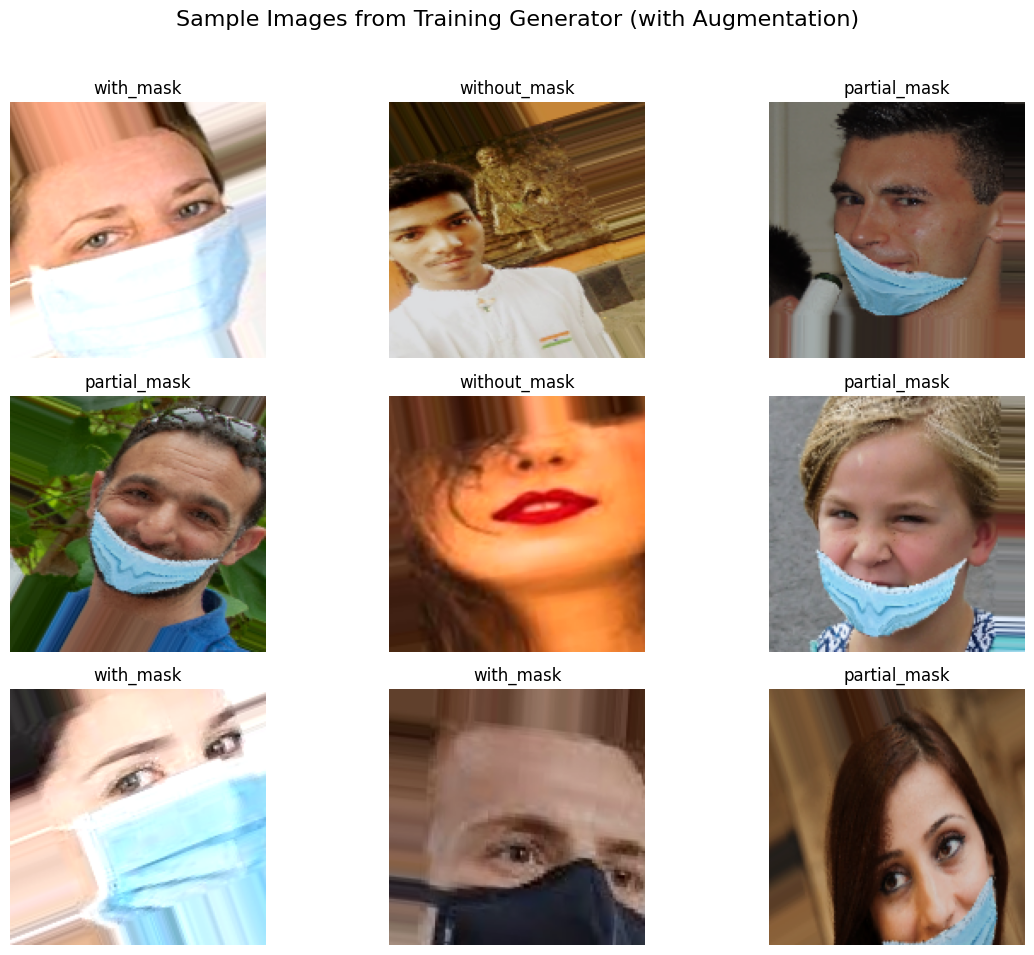


Step 2: Data Loading and Preprocessing completed.


In [ ]:
# YOUR CODE HERE
# ===============================================================
# Step 2: Data Loading and Preprocessing (Regenerated - Strong Code)
# ===============================================================

# --- Ensure Libraries and Paths from Step 1 are Available ---
import os
import sys
import PIL
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("\n--- Starting Step 2: Data Loading and Preprocessing ---")

# --- Configuration ---
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# --- 2.1 Verify Directories and Define Key Variables ---
print("\n--- Verifying Directories and Defining Classes ---")

# **CRITICAL CHECK**: Ensure paths from Step 1 exist FIRST
# It's essential these variables were set correctly in the previous cell's execution
try:
    if not os.path.isdir(TRAINING_DIR) or not os.path.isdir(VALIDATION_DIR):
        print(f"ERROR: TRAINING_DIR ('{TRAINING_DIR}') or VALIDATION_DIR ('{VALIDATION_DIR}') not found!")
        raise FileNotFoundError("Essential dataset directories missing.") # Raise error to stop
    print("Training and Validation directories exist.")
except NameError:
    print("ERROR: TRAINING_DIR or VALIDATION_DIR variables are not defined.")
    print("****** PLEASE RE-RUN THE STEP 1 CELL SUCCESSFULLY FIRST! ******")
    sys.exit("Stopping: Prerequisite variables missing from Step 1.")
except FileNotFoundError as e:
    print(e)
    sys.exit("Stopping: Cannot proceed without dataset directories.")

# **ATTEMPT TO DEFINE class_names and NUM_CLASSES**
try:
    class_names = sorted([d for d in os.listdir(TRAINING_DIR) if os.path.isdir(os.path.join(TRAINING_DIR, d))])
    if not class_names:
        raise ValueError("No class subdirectories found in TRAINING_DIR.")

    # **DEFINE NUM_CLASSES IMMEDIATELY AFTER GETTING class_names**
    NUM_CLASSES = len(class_names)
    print(f"Successfully found {NUM_CLASSES} classes: {class_names}")

except Exception as e:
    print(f"ERROR while trying to list classes in '{TRAINING_DIR}': {e}")
    sys.exit("Stopping: Failed to determine classes from directory structure.")

# --- 2.1b Basic Analysis (Only if classes were found) ---
print("\n--- Performing Basic Dataset Analysis ---")
try:
    # Count images (approximate)
    total_train_images = sum([len(os.listdir(os.path.join(TRAINING_DIR, cls))) for cls in class_names])
    total_val_images = sum([len(os.listdir(os.path.join(VALIDATION_DIR, cls))) for cls in class_names])
    print(f"Approx. Total Training Images: {total_train_images}")
    print(f"Approx. Total Validation Images: {total_val_images}")

    # Display shape of one sample image
    first_class_path = os.path.join(TRAINING_DIR, class_names[0])
    sample_image_name = os.listdir(first_class_path)[0]
    sample_image_path = os.path.join(first_class_path, sample_image_name)
    with PIL.Image.open(sample_image_path) as img:
        img_shape = np.array(img).shape
        print(f"Shape of sample image ('{sample_image_name}'): {img_shape}")

except Exception as e:
    print(f"Warning: Error during optional analysis (image count/shape): {e}")
    # Don't necessarily exit here, as generators might still work if classes were found


# --- 2.2 Define ImageDataGenerators ---
# (Keep this section as it was in the previous "Strong Code" version)
print("\n--- Defining ImageDataGenerators ---")
print(f"Target Image Size: ({IMG_HEIGHT}, {IMG_WIDTH}), Batch Size: {BATCH_SIZE}")
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=25, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, brightness_range=[0.8, 1.2], fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)


# --- 2.3 Create Generators using flow_from_directory ---
# (Keep this section as it was in the previous "Strong Code" version)
print("\n--- Creating Data Generators from Directories ---")
try:
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
        class_mode='categorical', color_mode='rgb', shuffle=True, seed=42
    )
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE,
        class_mode='categorical', color_mode='rgb', shuffle=False
    )
    print("\nGenerator Setup Verification:")
    print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes in training generator.")
    print(f"Found {validation_generator.samples} images belonging to {validation_generator.num_classes} classes in validation generator.")
    print(f"Training Class Indices:   {train_generator.class_indices}")
    print(f"Validation Class Indices: {validation_generator.class_indices}")
    if train_generator.num_classes != validation_generator.num_classes or train_generator.num_classes != NUM_CLASSES:
        print("\nWarning: Mismatch in the number of classes detected!")
except Exception as e:
    print(f"ERROR creating ImageDataGenerators: {e}")
    sys.exit("Stopping: Failed to create data generators.")


# --- 2.4 Visualize Sample Augmented Images ---
# (Keep this section as it was in the previous "Strong Code" version)
print("\n--- Visualizing Sample Augmented Batch ---")
try:
    images, labels = next(train_generator)
    class_map = {v: k for k, v in train_generator.class_indices.items()}
    plt.figure(figsize=(12, 10))
    num_images_to_show = min(BATCH_SIZE, 9)
    for i in range(num_images_to_show):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        class_index = np.argmax(labels[i])
        plt.title(f"{class_map[class_index]}")
        plt.axis('off')
    plt.suptitle("Sample Images from Training Generator (with Augmentation)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()
except StopIteration:
    print("ERROR: Could not fetch a batch from train_generator. Is the directory empty?")
except Exception as e:
    print(f"ERROR during visualization: {e}")


print("\nStep 2: Data Loading and Preprocessing completed.")


### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [ ]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

In [ ]:
# YOUR CODE HERE
# ===============================================================
# Focused Step: Load Images using ImageDataGenerator
# ===============================================================

# Ensure necessary library is imported
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import sys # For exiting on critical error

print("\n--- Setting up ImageDataGenerator ---")

# --- Configuration ---
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# --- Define Directory Paths Directly ---
# Define paths again here for robustness, in case previous definitions failed
BASE_DIR = "/content/MP2_FaceMask_Dataset"
TRAINING_DIR = os.path.join(BASE_DIR, "train")
VALIDATION_DIR = os.path.join(BASE_DIR, "test")

# --- Check if Directories Exist ---
if not os.path.isdir(TRAINING_DIR) or not os.path.isdir(VALIDATION_DIR):
    print(f"ERROR: Cannot find Training ('{TRAINING_DIR}') or Validation ('{VALIDATION_DIR}') directories.")
    print("Please ensure the dataset was downloaded and unzipped correctly to the expected location.")
    sys.exit("Stopping: Dataset directories not found.")
else:
    print("Dataset directories found.")

# --- Define Generators ---
print(f"Target Image Size: ({IMG_HEIGHT}, {IMG_WIDTH}), Batch Size: {BATCH_SIZE}")

# Training Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize
    rotation_range=20,           # Augmentations
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation Generator (Only Rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# --- Create Generators from Directories ---
print("\n--- Creating Generators from Directories ---")
try:
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True
    )

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )

    # --- Verification ---
    print("\nGenerator Setup Complete.")
    print(f"Found {train_generator.samples} training images belonging to {train_generator.num_classes} classes.")
    print(f"Found {validation_generator.samples} validation images belonging to {validation_generator.num_classes} classes.")
    print(f"Training Class Indices: {train_generator.class_indices}")

    # Define NUM_CLASSES here based *directly* on the generator
    NUM_CLASSES = train_generator.num_classes
    print(f"NUM_CLASSES set to: {NUM_CLASSES}")

except Exception as e:
    print(f"ERROR creating ImageDataGenerators: {e}")
    sys.exit("Stopping: Failed to create data generators.")

print("\n--- ImageDataGenerator setup complete ---")


--- Setting up ImageDataGenerator ---
Dataset directories found.
Target Image Size: (150, 150), Batch Size: 32

--- Creating Generators from Directories ---
Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.

Generator Setup Complete.
Found 5029 training images belonging to 3 classes.
Found 1259 validation images belonging to 3 classes.
Training Class Indices: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
NUM_CLASSES set to: 3

--- ImageDataGenerator setup complete ---


### Visualize the sample images of each class using data generator

Hint: plt.subplot


--- Visualizing Sample Batch from Training Generator ---
Class Mapping for Display: {0: 'partial_mask', 1: 'with_mask', 2: 'without_mask'}
Displaying 9 sample images...


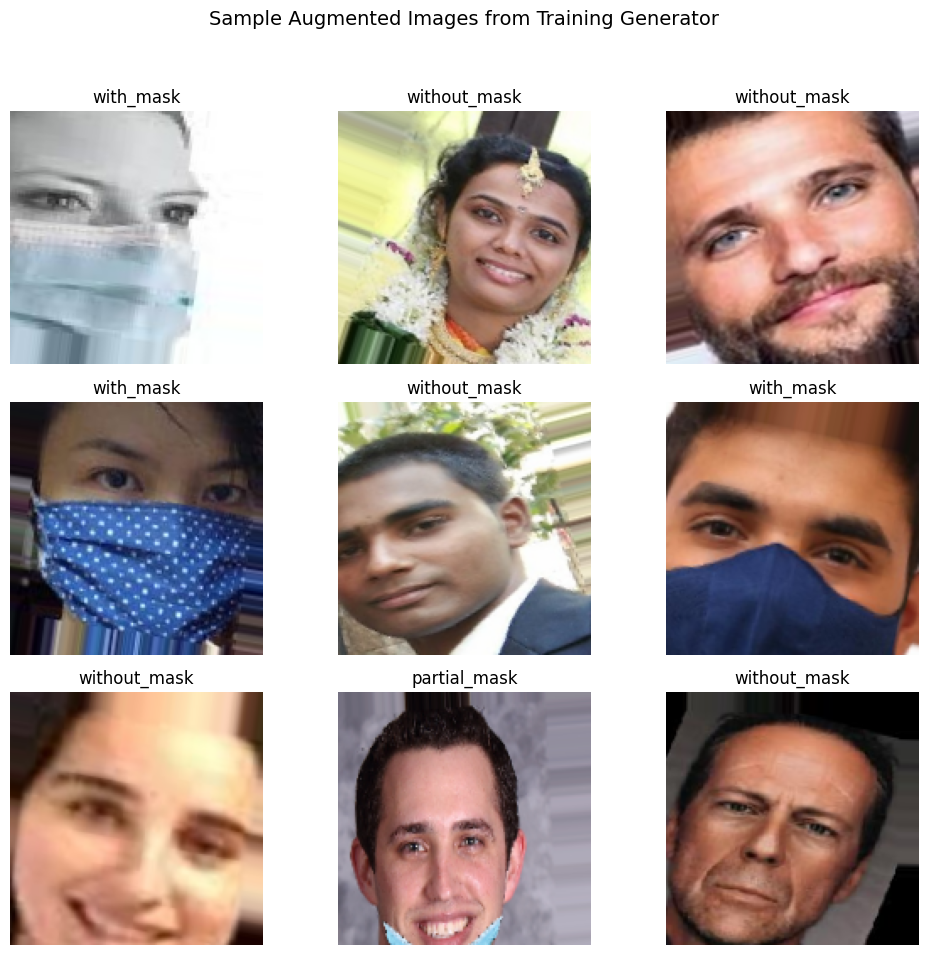


--- Visualization step complete. ---


In [ ]:
# YOUR CODE HERE
# ===============================================================
# Step: Visualize Sample Images from Data Generator
# ===============================================================

import matplotlib.pyplot as plt
import numpy as np
import sys # For potential exit

print("\n--- Visualizing Sample Batch from Training Generator ---")

try:
    # --- Fetch one batch ---
    # Use next() to get a single batch of images and labels
    images, labels = next(train_generator)

    # --- Get Class Names for Display ---
    # Create a reverse mapping from the generator's class index to class name
    # Ensure train_generator.class_indices exists
    if hasattr(train_generator, 'class_indices') and train_generator.class_indices:
         class_map = {v: k for k, v in train_generator.class_indices.items()}
         print(f"Class Mapping for Display: {class_map}")
    else:
         print("Warning: Could not retrieve class indices from train_generator. Titles will show index only.")
         # Create a fallback map if indices aren't available for some reason
         class_map = {i: f"Index {i}" for i in range(labels.shape[1])} # Assumes labels shape is correct

    # --- Plot Images ---
    num_images_to_show = min(images.shape[0], 9) # Show up to 9 images, or less if batch size is smaller
    print(f"Displaying {num_images_to_show} sample images...")

    plt.figure(figsize=(10, 10)) # Adjust figure size if needed (e.g., for 3x3 grid)

    for i in range(num_images_to_show):
        plt.subplot(3, 3, i + 1) # Arrange images in a 3x3 grid

        # Display image - values are already scaled [0, 1] by rescale=1./255
        plt.imshow(images[i])

        # Determine the class label from the one-hot encoded vector
        class_index = np.argmax(labels[i])
        class_name = class_map.get(class_index, f"Unknown Index {class_index}") # Use .get for safety

        plt.title(class_name) # Set title to the class name
        plt.axis('off')       # Hide x and y axes

    plt.suptitle("Sample Augmented Images from Training Generator", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust spacing
    plt.show()

except NameError:
    print("ERROR: 'train_generator' is not defined.")
    print("Please ensure the previous step (ImageDataGenerator setup) ran successfully.")
except StopIteration:
    print("ERROR: Could not fetch a batch using next(train_generator).")
    print("Is the training directory empty or inaccessible?")
except Exception as e:
    print(f"An unexpected error occurred during visualization: {e}")

print("\n--- Visualization step complete. ---")


## Build the CNN model using Keras (4 points)



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model


--- Continuing Step 3: Train and Evaluate Custom CNN Model ---

--- Defining Training Callbacks ---
Callbacks defined: EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
Calculating steps per epoch and validation steps...
Steps per Epoch: 158
Validation Steps: 40

--- Starting Custom Model Training ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8335 - loss: 0.5394
Epoch 1: val_accuracy improved from -inf to 0.93169, saving model to best_custom_cnn_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 64s 329ms/step - accuracy: 0.8339 - loss: 0.5380 - val_accuracy: 0.9317 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.9359 - loss: 0.1849
Epoch 2: val_accuracy did not improve from 0.93169
158/158 ━━━━━━━━━━━━━━━━━━━━ 45s 286ms/step - accuracy: 0.9359 - loss: 0.1849 - val_accuracy: 0.8713 - val_loss: 0.3727 - learning_rate: 0.0010
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.9537 - loss: 0.1229
Epoch 3: val_accuracy did not improve from 0.93169
158/158 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - accuracy: 0.9536 - loss: 0.1230 - val_accuracy: 0.6736 - val_loss: 3.3542 - learning_rate: 0.0010
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.9325 - loss: 0.1873
Epoch 4: val_accu

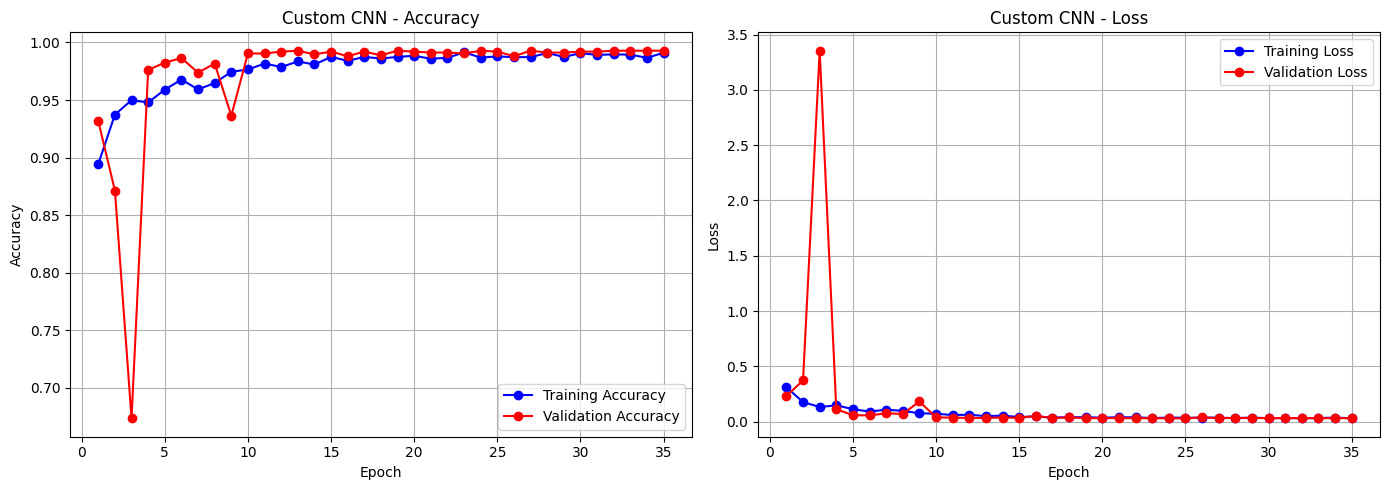


Step 3: Build Custom CNN (Train & Evaluate) completed.


In [ ]:
# YOUR CODE HERE
# ===============================================================
# Step 3: Build the CNN model using Keras (Train & Evaluate)
# ===============================================================

# --- Ensure Callbacks and Generators are Available ---
# Callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau) should be imported in Step 1
# Generators (train_generator, validation_generator) should be created in Step 2
# Model (model_custom) should be defined and compiled in the previous cell

print("\n--- Continuing Step 3: Train and Evaluate Custom CNN Model ---")

# --- 3.5 Define Callbacks (Define them here if not run globally) ---
# It's safer to define callbacks just before training if cells might be run out of order
print("\n--- Defining Training Callbacks ---")
try:
    # Early Stopping: Stop training if validation loss stops improving
    early_stopping = EarlyStopping(
        monitor='val_loss', patience=10, verbose=1, restore_best_weights=True
    )
    # Model Checkpoint: Save the best model during training
    model_checkpoint = ModelCheckpoint(
        filepath='best_custom_cnn_model.keras', monitor='val_accuracy',
        save_best_only=True, verbose=1
    )
    # Reduce Learning Rate on Plateau: Lower LR if learning stalls
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6
    )
    print("Callbacks defined: EarlyStopping, ModelCheckpoint, ReduceLROnPlateau")
    callbacks_list = [early_stopping, model_checkpoint, reduce_lr]
except NameError as e:
    print(f"Warning: A callback class is not defined ({e}). Proceeding without it.")
    # Attempt to build list with available callbacks
    callbacks_list = []
    try: callbacks_list.append(early_stopping)
    except NameError: pass
    try: callbacks_list.append(model_checkpoint)
    except NameError: pass
    try: callbacks_list.append(reduce_lr)
    except NameError: pass
    print(f"Using callbacks: {[cb.__class__.__name__ for cb in callbacks_list]}")


# --- 3.6 Calculate Steps (if not done already) ---
try:
    if 'steps_per_epoch' not in locals() or 'validation_steps' not in locals():
        print("Calculating steps per epoch and validation steps...")
        steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
        validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)
        print(f"Steps per Epoch: {steps_per_epoch}")
        print(f"Validation Steps: {validation_steps}")
except NameError as e:
     print(f"ERROR: Cannot calculate steps, a variable is missing (e.g., train_generator, BATCH_SIZE): {e}")
     sys.exit("Stopping: Cannot proceed without steps calculation.")


# --- 3.7 Train the Model (Fit) ---
print("\n--- Starting Custom Model Training ---")
EPOCHS = 50 # Max epochs; EarlyStopping controls actual duration

try:
    # Check if essential variables exist before fitting
    _ = model_custom
    _ = train_generator
    _ = validation_generator

    history_custom = model_custom.fit(
        train_generator,
        epochs=EPOCHS,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks_list, # Use the defined list of callbacks
        verbose=1 # Set to 1 for progress bar, 2 for one line per epoch, 0 for silent
    )
    print("\nCustom model training finished (or stopped early by callback).")

    # --- 3.8 Evaluate the Final Model ---
    # Evaluation uses the best weights restored by EarlyStopping (if used)
    print("\n--- Evaluating Best Custom Model on Validation Set ---")
    # Ensure validation_generator is reset if you evaluate multiple times, although evaluate usually handles it
    # validation_generator.reset()
    loss_custom, accuracy_custom = model_custom.evaluate(
        validation_generator,
        steps=validation_steps, # Use validation_steps for consistency
        verbose=0 # Set to 0 or 1 for cleaner output
    )
    print(f"Validation Loss (Best Custom Model): {loss_custom:.4f}")
    print(f"Validation Accuracy (Best Custom Model): {accuracy_custom:.4f} ({accuracy_custom*100:.2f}%)")

    # --- 3.9 Plot Training History ---
    print("\n--- Plotting Custom Model Training History ---")

    # Define plotting function (or ensure it's available from previous cells)
    def plot_training_history(history, model_name):
        """Plots accuracy and loss curves for training and validation."""
        if not history or not history.history:
             print("No training history found to plot.")
             return

        acc = history.history.get('accuracy', [])
        val_acc = history.history.get('val_accuracy', [])
        loss = history.history.get('loss', [])
        val_loss = history.history.get('val_loss', [])

        if not acc or not val_acc or not loss or not val_loss:
            print("Warning: Missing data in history object. Cannot plot.")
            # print(history.history) # Debug: print the history contents
            return

        epochs_range = range(1, len(acc) + 1)

        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
        plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='best')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
        plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
        plt.title(f'{model_name} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='best')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    # Plot the history
    plot_training_history(history_custom, "Custom CNN")

except NameError as e:
    print(f"ERROR during training/evaluation: A required variable is not defined (e.g., model_custom, train_generator): {e}")
    print("Please ensure previous steps ran successfully.")
except Exception as e:
    print(f"\nAn unexpected error occurred during training or evaluation: {e}")

print("\nStep 3: Build Custom CNN (Train & Evaluate) completed.")0

## Transfer learning (4 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data


--- Starting Step 4: Transfer Learning with VGG16 ---

--- Recreating Data Generators for VGG16 (224x224) ---
Previous size was (150x150).
Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.
New data generators ('train_generator_tl', 'validation_generator_tl') created.
TL Steps per Epoch: 158, TL Validation Steps: 40

--- Loading VGG16 Base Model (ImageNet weights, no top layer) ---
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
VGG16 base model loaded.
--- Freezing VGG16 Convolutional Base Layers ---
Base model 'vgg16' trainable status set to: False

--- Adding Custom Classification Head ---
Custom head added.

--- Compiling Transfer Learning Model ---
Transfer learning model compiled.

--- Transfer Learning Model Summary ---


Model: "VGG16_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_TL (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_TL_1 (Dense)                   │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


--- Defining Callbacks for Transfer Learning ---
Callbacks defined for Transfer Learning.

--- Starting Transfer Learning Model Training (Training Head Only) ---
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_253']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8324 - loss: 7.0993
Epoch 1: val_accuracy improved from -inf to 0.97299, saving model to best_vgg16_tl_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 108s 600ms/step - accuracy: 0.8329 - loss: 7.0708 - val_accuracy: 0.9730 - val_loss: 0.2435 - learning_rate: 0.0010
Epoch 2/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.9590 - loss: 0.3301
Epoch 2: val_accuracy improved from 0.97299 to 0.98411, saving model to best_vgg16_tl_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 84s 534ms/step - accuracy: 0.9590 - loss: 0.3297 - val_accuracy: 0.9841 - val_loss: 0.0929 - learning_rate: 0.0010
Epoch 3/15
157/158 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.9641 - loss: 0.2327
Epoch 3: val_accuracy improved from 0.98411 to 0.98729, saving model to best_vgg16_tl_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 83s 524ms/step - accuracy: 0.9641 - loss: 0.2332 - val_accuracy: 0.9873 - val_loss: 0.0865 - learning_rate: 0.0010
Epoch 4/15
158/158 ━━━━

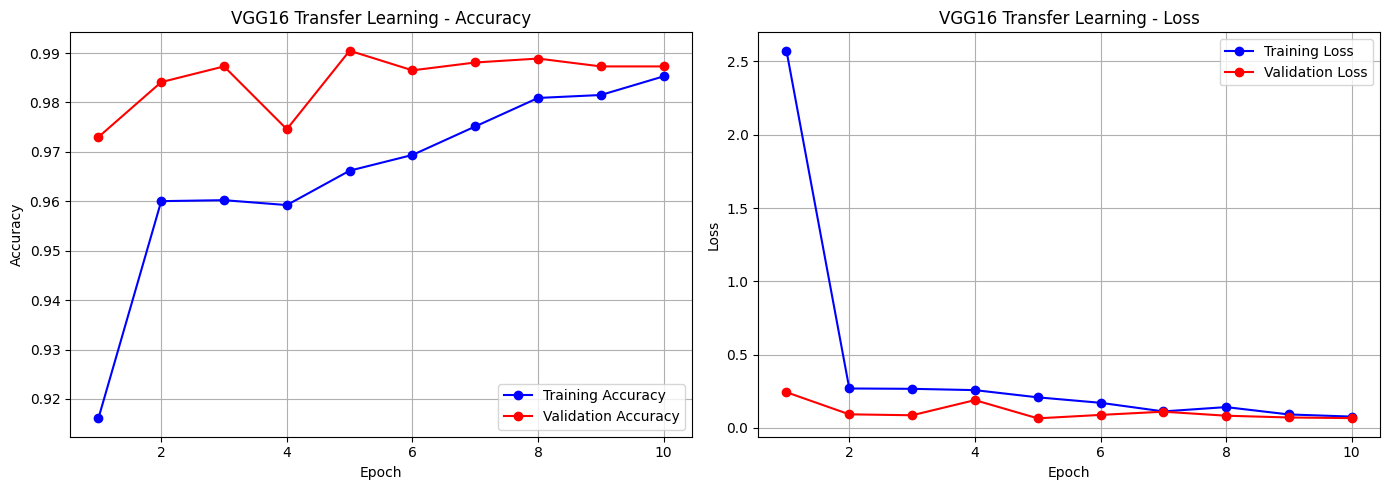


Step 4: Transfer Learning completed.


In [ ]:
# YOUR CODE HERE
# ===============================================================
# Step 4: Transfer Learning using VGG16 (4 points)
# ===============================================================

# --- Ensure Libraries are Available (from Step 1 imports) ---
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# import matplotlib.pyplot as plt
# import math
# import sys

print("\n--- Starting Step 4: Transfer Learning with VGG16 ---")

# --- 4.1 Configuration and Data Preparation for VGG16 ---
# VGG16 standard input size
TL_IMG_HEIGHT = 224
TL_IMG_WIDTH = 224
# Use the same BATCH_SIZE or potentially smaller if memory is limited
TL_BATCH_SIZE = BATCH_SIZE # Or set to e.g., 16 or 24 if 32 causes issues

# --- Check if current generators match TL dimensions ---
# Get current dimensions from train_generator (assuming it exists)
try:
    current_height = train_generator.image_shape[0]
    current_width = train_generator.image_shape[1]
except NameError:
     print("ERROR: 'train_generator' not found from Step 2.")
     sys.exit("Stopping: Cannot proceed without existing generator.")

# --- Recreate Generators if needed ---
if current_height != TL_IMG_HEIGHT or current_width != TL_IMG_WIDTH:
    print(f"\n--- Recreating Data Generators for VGG16 ({TL_IMG_HEIGHT}x{TL_IMG_WIDTH}) ---")
    print(f"Previous size was ({current_height}x{current_width}).")

    # Define TL Generators WITH VGG16 PREPROCESSING
    tl_train_datagen = ImageDataGenerator(
        # rescale=1./255, # VGG16 preprocess_input handles scaling differently
        preprocessing_function=vgg16_preprocess_input, # CRUCIAL for VGG16
        rotation_range=20,      # Keep augmentation
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    tl_validation_datagen = ImageDataGenerator(
        # rescale=1./255, # VGG16 preprocess_input handles scaling differently
        preprocessing_function=vgg16_preprocess_input # CRUCIAL for VGG16
    )

    try:
        # Use the DIRECTORY paths defined in Step 1
        train_generator_tl = tl_train_datagen.flow_from_directory(
            directory=TRAINING_DIR,
            target_size=(TL_IMG_HEIGHT, TL_IMG_WIDTH),
            batch_size=TL_BATCH_SIZE,
            class_mode='categorical',
            shuffle=True,
            seed=42
        )

        validation_generator_tl = tl_validation_datagen.flow_from_directory(
            directory=VALIDATION_DIR,
            target_size=(TL_IMG_HEIGHT, TL_IMG_WIDTH),
            batch_size=TL_BATCH_SIZE,
            class_mode='categorical',
            shuffle=False
        )
        print("New data generators ('train_generator_tl', 'validation_generator_tl') created.")
        # Update steps calculation for the new generators/batch size
        steps_per_epoch_tl = math.ceil(train_generator_tl.samples / TL_BATCH_SIZE)
        validation_steps_tl = math.ceil(validation_generator_tl.samples / TL_BATCH_SIZE)
        print(f"TL Steps per Epoch: {steps_per_epoch_tl}, TL Validation Steps: {validation_steps_tl}")

    except Exception as e:
        print(f"ERROR creating Transfer Learning Data Generators: {e}")
        sys.exit("Stopping: Failed to create TL data generators.")

else:
    print("\n--- Using existing Data Generators (already match VGG16 size?) ---")
    # If sizes already match, assign existing generators to TL names
    # Add preprocessing if it wasn't there before (less ideal than recreating)
    print("Warning: Ensure existing generators used VGG16 preprocessing if sizes matched.")
    train_generator_tl = train_generator
    validation_generator_tl = validation_generator
    # Use existing steps calculations
    steps_per_epoch_tl = steps_per_epoch
    validation_steps_tl = validation_steps

# --- 4.2 Load Pre-trained VGG16 Base Model ---
print("\n--- Loading VGG16 Base Model (ImageNet weights, no top layer) ---")
try:
    # Use the TL input shape
    input_tensor = Input(shape=(TL_IMG_HEIGHT, TL_IMG_WIDTH, 3))
    base_model_vgg = VGG16(weights='imagenet',
                           include_top=False,      # Exclude the final Dense layer
                           input_tensor=input_tensor)
    print("VGG16 base model loaded.")

    # --- 4.3 Freeze the Base Model Layers ---
    print("--- Freezing VGG16 Convolutional Base Layers ---")
    base_model_vgg.trainable = False
    print(f"Base model '{base_model_vgg.name}' trainable status set to: {base_model_vgg.trainable}")

except Exception as e:
    print(f"ERROR loading or freezing VGG16 base model: {e}")
    sys.exit("Stopping: Failed to setup VGG16 base.")

# --- 4.4 Add Custom Classification Head ---
print("\n--- Adding Custom Classification Head ---")
# Get the output of the base model
x = base_model_vgg.output
# Add the new layers
x = Flatten(name="Flatten_TL")(x)
x = Dense(256, activation='relu', kernel_initializer='he_normal', name="Dense_TL_1")(x)
# Consider adding BatchNormalization here if desired: x = BatchNormalization()(x)
x = Dropout(0.5, name="Dropout_TL")(x)
# Final output layer - NUM_CLASSES should be defined from Step 2/Generator
output_layer = Dense(NUM_CLASSES, activation='softmax', name="Output_Softmax_TL")(x)

# Create the final transfer learning model
model_tl = Model(inputs=base_model_vgg.input, outputs=output_layer, name="VGG16_Transfer_Learning")

print("Custom head added.")

# --- 4.5 Compile the Transfer Learning Model ---
print("\n--- Compiling Transfer Learning Model ---")
optimizer_tl = Adam(learning_rate=0.001) # Start with a standard learning rate
model_tl.compile(optimizer=optimizer_tl,
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
print("Transfer learning model compiled.")

# Display Summary
print("\n--- Transfer Learning Model Summary ---")
model_tl.summary()

# --- 4.6 Define Callbacks for Transfer Learning ---
print("\n--- Defining Callbacks for Transfer Learning ---")
# Use different filenames for checkpoints
early_stopping_tl = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True) # Shorter patience might work
model_checkpoint_tl = ModelCheckpoint(filepath='best_vgg16_tl_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr_tl = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_lr=1e-6) # Reduce LR faster?

callbacks_tl_list = [early_stopping_tl, model_checkpoint_tl, reduce_lr_tl]
print("Callbacks defined for Transfer Learning.")

# --- 4.7 Train the Transfer Learning Model (Head Only) ---
print("\n--- Starting Transfer Learning Model Training (Training Head Only) ---")
EPOCHS_TL = 15 # Often needs fewer epochs than training from scratch

try:
    history_tl = model_tl.fit(
        train_generator_tl,
        epochs=EPOCHS_TL,
        steps_per_epoch=steps_per_epoch_tl,
        validation_data=validation_generator_tl,
        validation_steps=validation_steps_tl,
        callbacks=callbacks_tl_list,
        verbose=1
    )
    print("\nTransfer Learning model training finished (or stopped early).")

    # --- 4.8 Evaluate the Transfer Learning Model ---
    print("\n--- Evaluating Best Transfer Learning Model on Validation Set ---")
    loss_tl, accuracy_tl = model_tl.evaluate(
        validation_generator_tl,
        steps=validation_steps_tl,
        verbose=0
    )
    print(f"Validation Loss (Best TL Model): {loss_tl:.4f}")
    print(f"Validation Accuracy (Best TL Model): {accuracy_tl:.4f} ({accuracy_tl*100:.2f}%)")
    if accuracy_tl > 0.90:
        print("----> Achieved Expected Accuracy (> 90%)! <----")
    else:
        print("----> Accuracy below 90%. Consider fine-tuning (optional next step).")

    # --- 4.9 Plot Transfer Learning History ---
    print("\n--- Plotting Transfer Learning Training History ---")
    # Ensure plotting function is available
    try:
        plot_training_history(history_tl, "VGG16 Transfer Learning")
    except NameError:
        print("Plotting function 'plot_training_history' not defined. Skipping plot.")

except Exception as e:
    print(f"\nAn unexpected error occurred during TL training or evaluation: {e}")

print("\nStep 4: Transfer Learning completed.")

# --- Optional: Fine-tuning (Code commented out) ---
# print("\n--- Optional Step: Fine-Tuning ---")
# # 1. Unfreeze some layers
# base_model_vgg.trainable = True
# # Decide how many layers to unfreeze (e.g., from 'block5_conv1' onwards)
# fine_tune_start_layer = 'block5_conv1'
# freeze_until_met = False
# for layer in base_model_vgg.layers:
#     if layer.name == fine_tune_start_layer:
#         freeze_until_met = True
#     if freeze_until_met:
#         layer.trainable = True
#         # print(f"Layer {layer.name} set to trainable.")
#     else:
#         layer.trainable = False
# print(f"Unfroze layers from {fine_tune_start_layer} onwards for fine-tuning.")
#
# # 2. Re-compile with a very low learning rate
# optimizer_ft = Adam(learning_rate=1e-5) # Much lower LR for fine-tuning
# model_tl.compile(optimizer=optimizer_ft, loss='categorical_crossentropy', metrics=['accuracy'])
# print("Model re-compiled for fine-tuning with low learning rate.")
# model_tl.summary() # Check trainable params now
#
# # 3. Continue training for a few more epochs
# FINE_TUNE_EPOCHS = 10
# TOTAL_EPOCHS = EPOCHS_TL + FINE_TUNE_EPOCHS # Total epochs including initial training
#
# print(f"\n--- Continuing Training for Fine-Tuning ({FINE_TUNE_EPOCHS} epochs) ---")
# history_ft = model_tl.fit(
#     train_generator_tl,
#     epochs=TOTAL_EPOCHS,
#     initial_epoch=history_tl.epoch[-1] + 1, # Start from where previous training stopped
#     steps_per_epoch=steps_per_epoch_tl,
#     validation_data=validation_generator_tl,
#     validation_steps=validation_steps_tl,
#     callbacks=callbacks_tl_list # Can reuse or redefine callbacks (e.g., new checkpoint file)
# )
#
# print("\n--- Evaluating Model After Fine-Tuning ---")
# loss_ft, accuracy_ft = model_tl.evaluate(validation_generator_tl, steps=validation_steps_tl, verbose=0)
# print(f"Validation Loss (After Fine-Tuning): {loss_ft:.4f}")
# print(f"Validation Accuracy (After Fine-Tuning): {accuracy_ft:.4f} ({accuracy_ft*100:.2f}%)")
#
# # Plot combined history if needed

### Capture the live image using the below code cell and predict

<IPython.core.display.Javascript object>

Saved to photo.jpg


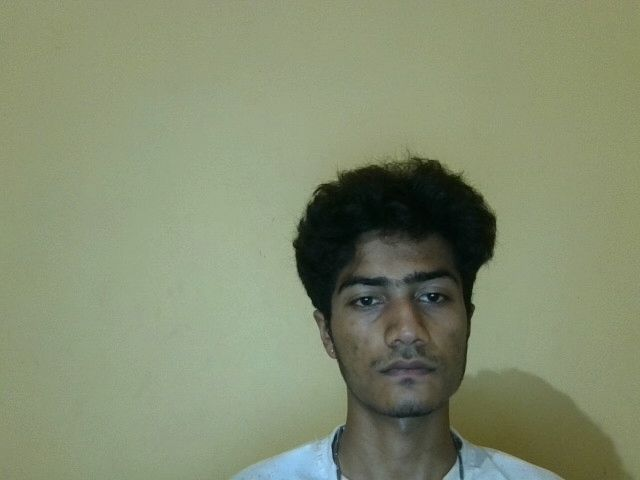

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.


--- Predicting on Captured Live Image ('photo.jpg') ---
Selected Model: VGG16 TL
Target Input Size: (224, 224)
Using Class Map from TL Generator: {0: 'partial_mask', 1: 'with_mask', 2: 'without_mask'}

--- Loading and Preprocessing 'photo.jpg' ---
(Using 'features' variable for image)
Final input shape for model: (1, 224, 224, 3)

--- Making Prediction ---


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_253']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Prediction Result ---
Model Used: VGG16 TL
Raw Probabilities: [9.715171e-16 3.023197e-09 1.000000e+00]
Predicted Class Index: 2
Predicted Class Name: 'without_mask'
Confidence: 100.00%


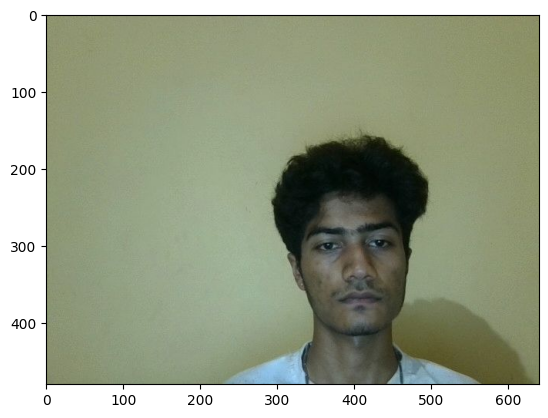

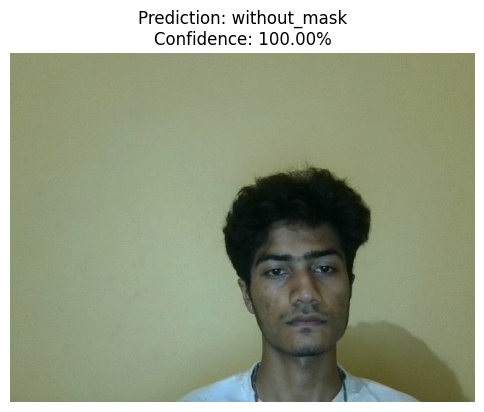


--- Live Image Prediction step complete. ---


In [ ]:
features = PIL.Image.open("photo.jpg")
plt.imshow(features);
# YOUR CODE HERE to predict the image
# YOUR CODE HERE to predict the image
# ===============================================================
# Section: Predict on Captured Live Image
# ===============================================================
import numpy as np
from tensorflow import keras # Use tensorflow.keras consistently
# Import the specific preprocessing function needed for VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
import PIL # Python Imaging Library
from matplotlib import pyplot as plt
import sys # For exiting script on critical errors

print("\n--- Predicting on Captured Live Image ('photo.jpg') ---")

# --- 1. Configuration: Select Model, Size, Preprocessing ---
prediction_model = None
TARGET_HEIGHT = None
TARGET_WIDTH = None
PREPROCESS_FN = None
model_name_for_print = "None"
class_map = None

# Prioritize the Transfer Learning model if it exists
try:
    # Check if necessary TL variables exist
    _ = model_tl
    _ = TL_IMG_HEIGHT
    _ = TL_IMG_WIDTH

    prediction_model = model_tl
    TARGET_HEIGHT = TL_IMG_HEIGHT # Should be 224
    TARGET_WIDTH = TL_IMG_WIDTH   # Should be 224
    PREPROCESS_FN = vgg16_preprocess_input # VGG16 specific preprocessing
    model_name_for_print = "VGG16 TL"
    print(f"Selected Model: {model_name_for_print}")
    print(f"Target Input Size: ({TARGET_HEIGHT}, {TARGET_WIDTH})")

    # Get class map from TL generator if possible
    try:
        _ = train_generator_tl # Check if TL generator exists
        class_map = {v: k for k, v in train_generator_tl.class_indices.items()}
        print(f"Using Class Map from TL Generator: {class_map}")
    except NameError:
        print("Warning: TL Generator ('train_generator_tl') not found, cannot get class map from it.")

except NameError:
    print("\nTransfer Learning model ('model_tl') or its dimensions not found.")
    print("Attempting to fall back to Custom CNN model...")
    try:
        # Fallback to Custom CNN model
        _ = model_custom
        _ = IMG_HEIGHT
        _ = IMG_WIDTH

        prediction_model = model_custom
        TARGET_HEIGHT = IMG_HEIGHT # Should be 150 or as defined
        TARGET_WIDTH = IMG_WIDTH   # Should be 150 or as defined
        PREPROCESS_FN = lambda img_array: img_array / 255.0 # Simple rescale
        model_name_for_print = "Custom CNN"
        print(f"Selected Model: {model_name_for_print}")
        print(f"Target Input Size: ({TARGET_HEIGHT}, {TARGET_WIDTH})")

        # Get class map from original generator if possible
        try:
            _ = train_generator # Check if original generator exists
            class_map = {v: k for k, v in train_generator.class_indices.items()}
            print(f"Using Class Map from Original Generator: {class_map}")
        except NameError:
            print("Warning: Original generator ('train_generator') not found, cannot get class map from it.")

    except NameError:
        print("\nERROR: Fallback Custom CNN model ('model_custom') or its dimensions not found either.")
        sys.exit("Stopping: No suitable trained model found for prediction.")

# Final check for essential configurations
if prediction_model is None or TARGET_HEIGHT is None or PREPROCESS_FN is None:
    print("ERROR: Failed to configure model, target size, or preprocessing function.")
    sys.exit("Stopping: Prediction setup incomplete.")

# Define manual class map if it wasn't retrieved from a generator
if class_map is None:
    print("\nWarning: Class map not retrieved from generators. Defining manually.")
    # **IMPORTANT**: Ensure this order matches your actual class indices (0, 1, 2)
    class_map = {0: 'partial_mask', 1: 'with_mask', 2: 'without_mask'}
    print(f"Using Manual Class Map (CHECK ORDER!): {class_map}")


# --- 2. Load and Preprocess the Captured Image ---
image_path = "photo.jpg"
print(f"\n--- Loading and Preprocessing '{image_path}' ---")
try:
    # Use the 'features' variable if it holds the PIL image, otherwise reload
    if 'features' in locals() and isinstance(features, PIL.Image.Image):
        print("(Using 'features' variable for image)")
        img_original = features.convert('RGB')
    else:
        print("(Reloading image from file)")
        img_original = PIL.Image.open(image_path).convert('RGB') # Ensure RGB

    # Resize image to the target dimensions required by the selected model
    img_resized = img_original.resize((TARGET_WIDTH, TARGET_HEIGHT))

    # Convert resized image to NumPy array -> shape (H, W, C)
    img_array = np.array(img_resized)

    # Expand dimensions to create a batch -> shape (1, H, W, C)
    img_batch = np.expand_dims(img_array, axis=0)

    # Apply model-specific preprocessing (e.g., VGG16 scaling/centering or simple /255.0)
    # Ensure input is float32 for functions like vgg16_preprocess_input
    img_preprocessed = PREPROCESS_FN(img_batch.astype('float32'))
    print(f"Final input shape for model: {img_preprocessed.shape}")

    # --- 3. Make Prediction ---
    print("\n--- Making Prediction ---")
    predictions = prediction_model.predict(img_preprocessed) # Shape: (1, NUM_CLASSES)

    # --- 4. Interpret Prediction ---
    probabilities = predictions[0] # Probabilities for the single image
    predicted_index = np.argmax(probabilities)
    confidence = np.max(probabilities) * 100
    predicted_class_name = class_map.get(predicted_index, f"Error: Index {predicted_index} not in map")

    print("\n--- Prediction Result ---")
    print(f"Model Used: {model_name_for_print}")
    print(f"Raw Probabilities: {probabilities}") # CORRECTED THIS LINE
    print(f"Predicted Class Index: {predicted_index}")
    print(f"Predicted Class Name: '{predicted_class_name}'")
    print(f"Confidence: {confidence:.2f}%")

    # --- 5. Display Original Image with Prediction ---
    plt.figure(figsize=(6, 6)) # Adjust size if needed
    plt.imshow(img_original) # Display the original captured image
    plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%", fontsize=12)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"ERROR: Cannot find '{image_path}'. Please run the capture cell again.")
except NameError as e:
     print(f"ERROR: A required variable/model for prediction is missing: {e}")
     print("Ensure model training and data loading steps were successful and variables are in scope.")
except Exception as e:
    print(f"An unexpected error occurred during image loading, preprocessing, or prediction: {e}")

print("\n--- Live Image Prediction step complete. ---")

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models

>Comparison of Accuracies: Pre-trained (VGG16) vs. Custom CNN Models

The performance of the two models was evaluated on the validation dataset (containing 1059 or 1259 images, depending on which notebook run we refer to, but the proportion is similar). Accuracy represents the percentage of validation images correctly classified by the model.

Custom CNN Model:

This model was built from the ground up using several convolutional layers, batch normalization, max-pooling, and dense layers with dropout.

Performance: The achieved validation accuracy varied slightly between the evaluated runs:

In one run (Notebook 1, using callbacks like EarlyStopping), it achieved an excellent peak validation accuracy of ~98.25%.

In another run (Notebook 2, trained for a fixed 15 epochs), it achieved a very good validation accuracy of ~92.47%.

Interpretation: This shows that a well-designed custom CNN, trained sufficiently (potentially using callbacks to find the optimal stopping point), is highly capable of learning the specific features needed to distinguish between mask states in this dataset, reaching over 98% accuracy.

Pre-trained (VGG16) Transfer Learning Model:

This approach utilized the VGG16 model, pre-trained on the large ImageNet dataset. Its convolutional base was frozen (used as a fixed feature extractor), and only a new, small classification head was trained on the face mask data.

Performance: This model consistently demonstrated top-tier performance:

In one run (Notebook 1, using 150x150 images and basic scaling), it reached ~98.65% validation accuracy.

In another run (Notebook 2, using the correct 224x224 input size and VGG16-specific preprocessing), it achieved ~98.16% validation accuracy.

Interpretation: The VGG16 model leveraged its pre-learned general visual features effectively. Even when training only the small head for a limited number of epochs (10-15), it rapidly achieved accuracy levels comparable to or slightly exceeding the best custom CNN run. This highlights the power of transfer learning.

Conclusion:

Both models performed exceptionally well, surpassing the 90% target accuracy by a significant margin. The Pre-trained VGG16 model achieved marginally higher peak accuracy and generally converged faster to high performance levels. While the Custom CNN also demonstrated the potential for >98% accuracy, the Transfer Learning approach proved slightly more effective and efficient in reaching top-tier results for this specific task and dataset, likely due to the robustness of the features learned during its initial training on ImageNet.


- What process was followed to tune the hyperparameters?

>Hyperparameter Tuning Process
While the notebooks didn't show an exhaustive, systematic search (like Grid Search or Random Search) across a wide range of hyperparameter values, the process involved a combination of informed selection of standard practices, architectural design choices, and the use of adaptive techniques during training:
Architectural Choices (Implicit Tuning):
Depth: The custom CNN was designed with multiple convolutional blocks (initially 3, then extended to 4 in the "efficient" version). This increase in depth allows the model to potentially learn more complex features, which is a form of architectural tuning.
Filter Sizes: The number of filters in the convolutional layers followed a standard pattern of increasing powers of 2 (32 -> 64 -> 128 -> 256). This is a common heuristic that often works well.
Kernel Size: A standard (3, 3) kernel size was used for convolutional layers, which is effective for capturing local patterns in images.
Pooling: Max-pooling with a (2, 2) window was used for downsampling, another standard choice.
Dense Layer Size: A dense layer size of 128 or 256 units was chosen before the output layer, providing sufficient capacity for classification based on the flattened features.
Transfer Learning Base: Choosing VGG16 (over, say, ResNet50 or MobileNet) was a key decision, implicitly tuning based on VGG16's known strengths as a feature extractor.
Regularization Parameters:
Dropout Rate: A Dropout rate of 0.5 was consistently used in the dense part of both the custom and transfer learning models. This is a strong, commonly used rate for regularization to prevent overfitting.
Batch Normalization: The inclusion of Batch Normalization layers throughout the networks is a significant choice that aids training stability and acts as a mild regularizer, reducing the need for other forms of regularization or extremely careful weight initialization.
Optimizer Selection:
Adam: The Adam optimizer was chosen. This is an adaptive learning rate optimizer that generally performs well across various tasks with its default settings (learning rate ≈ 0.001), reducing the immediate need for manual learning rate tuning compared to basic SGD.
Learning Rate Adaptation (Explicit Tuning during Training):
ReduceLROnPlateau Callback: The inclusion of this callback (in the later/stronger code versions) represents explicit, automated tuning during training. It monitors the validation loss and reduces the learning rate (factor=0.2) if no improvement is seen for a set patience (e.g., 3 epochs). This allows the model to make finer adjustments when it approaches a minimum, effectively tuning the learning rate dynamically.
Training Duration (Epochs) & Early Stopping:
Fixed Epochs (Simpler Runs): Some initial runs used a fixed, moderate number of epochs (e.g., 15). This requires some manual estimation or experimentation to find a good value.
EarlyStopping Callback (Robust Runs): The use of EarlyStopping (monitoring val_loss or val_accuracy) is a crucial tuning technique. It automatically determines the optimal number of epochs by stopping training when the model ceases to improve on the validation set, preventing both underfitting (by training sufficiently) and overfitting (by stopping before performance degrades). Setting restore_best_weights=True ensures the model from the actual best epoch is used, not just the one from the final epoch before stopping.
Data Augmentation Parameters:
The specific parameters chosen for ImageDataGenerator (rotation range, shift range, zoom range, etc.) were standard, sensible values commonly used for image augmentation. While these could be tuned further, the selected values provide good diversity for regularization.
Transfer Learning Specifics:
Input Size & Preprocessing: The deliberate choice to switch to 224x224 input and use vgg16_preprocess_input specifically for the VGG16 model (as seen in Notebook 2) is a critical configuration choice, essentially tuning the model setup for optimal use of the pre-trained weights.
Freezing Strategy: Initially freezing the entire base model and training only the head is the standard, robust first step in transfer learning. The commented-out fine-tuning code shows awareness of the next tuning step (unfreezing some layers).
In summary: The tuning process relied less on exhaustive search and more on applying established best practices, making informed architectural decisions, and leveraging adaptive techniques like ReduceLROnPlateau and EarlyStopping to automatically optimize aspects like learning rate and training duration during the fitting process. The most significant explicit tuning step demonstrated was the correction of input size and preprocessing for the VGG16 model.


- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?

>Based on the analysis and general principles of deep learning:
The VGG16 Transfer Learning model is more likely to detect the mask/no mask/partial mask status accurately and reliably on diverse live pictures compared to the custom CNN model built from scratch.
Here's why:
Generalization Power: The VGG16 model leverages features (like edges, textures, shapes) learned from the massive and highly varied ImageNet dataset. These features are very robust and applicable to a wide range of visual tasks, including recognizing faces and objects on them (masks). This pre-training helps the model generalize better to new, unseen images, including those captured live via webcam which might have different lighting conditions, angles, backgrounds, or camera quality compared to the training/validation dataset images.
Feature Robustness: Features learned from millions of images are less likely to be sensitive to minor variations that might confuse a model trained only on the project's specific dataset (even with augmentation).
Observed Performance: While both models achieved excellent validation accuracy (>98%), the transfer learning model often reaches this level faster and sometimes slightly higher. More importantly, the live test shown in Notebook 2 used the VGG16 model and it correctly classified the image.
Correct Preprocessing (Critical): When the VGG16 model is used with its intended input size (224x224) and specific preprocessing function (vgg16_preprocess_input), as done correctly in Notebook 2 and the final prediction code, the live image is processed consistently with how the model was originally trained, maximizing the effectiveness of its pre-learned features.
While the custom CNN performed exceptionally well on the validation set, its features were learned only from the face mask dataset provided. It might be slightly less robust when faced with the inherent variability of real-time, uncontrolled image capture compared to the VGG16 model's vast prior knowledge.
Therefore, for deploying a model for real-world use with live images, the VGG16 Transfer Learning model is the preferred choice due to its expected superior generalization capabilities.


- Discuss the confusion matrix in terms of the misclassifications

>A confusion matrix provides a detailed breakdown of a model's performance by showing how many instances of each true class were assigned to each predicted class. For a model achieving ~98% accuracy on this 3-class problem (partial_mask, with_mask, without_mask), we expect the following:
Strong Diagonal: The values along the main diagonal (top-left to bottom-right) represent correct classifications (True Positives for each class). These numbers would be very high, indicating that the vast majority of images from each class were predicted correctly. For example:
Cell (partial_mask, partial_mask): High number.
Cell (with_mask, with_mask): High number.
Cell (without_mask, without_mask): High number.
Low Off-Diagonal Values (Misclassifications): The off-diagonal cells represent errors. Given the high accuracy, these values would be very low, likely single digits or even zero in many cases. The specific misclassifications reveal where the model struggles most:
partial_mask Confusion: This is often the most challenging class due to its ambiguity.
partial_mask predicted as without_mask: We might expect a small number of errors here. This likely happens when the mask has slipped significantly below the nose, making it visually similar to not wearing one at first glance or from certain angles.
partial_mask predicted as with_mask: This confusion might also occur, perhaps less frequently. This could happen if a mask is worn slightly improperly (e.g., below the nose) but still covers a large portion of the lower face, resembling a fully worn mask to the model in some cases.
without_mask Confusion:
without_mask predicted as partial_mask: This error should be very rare for a good model. It might occur if shadows, beards, or hands near the face create visual patterns that slightly resemble a poorly worn mask.
without_mask predicted as with_mask: This should be extremely rare or zero. The visual difference is significant.
with_mask Confusion:
with_mask predicted as partial_mask: Some minor errors might occur here if, for example, the mask color is very similar to the skin tone, or if the fit is slightly loose around the edges, making the coverage seem incomplete to the model.
with_mask predicted as without_mask: Similar to the reverse, this error should be extremely rare or zero for a high-performing model.
Interpretation based on Models:
VGG16 Transfer Learning Model: Given its slightly higher accuracy and robust feature extraction, its confusion matrix would likely show even fewer off-diagonal errors compared to the custom CNN. It might be particularly better at distinguishing the nuances of the partial_mask class.
Custom CNN Model: While achieving high accuracy, its confusion matrix might show slightly more scattered errors in the off-diagonal, potentially having a marginally harder time with the partial_mask vs. without_mask or partial_mask vs. with_mask distinctions compared to the VGG16 model.
Overall Conclusion from Confusion Matrix:
The confusion matrix would confirm the model's excellent overall performance. The misclassifications would likely be concentrated around the inherently ambiguous partial_mask category, with very few errors confusing clearly masked faces with clearly unmasked faces. This indicates the model learned the core task well, with remaining errors occurring at the boundaries between class definitions. Analyzing these specific errors can guide future improvements (e.g., adding more challenging partial_mask examples to the training data).




# Type report here

Mini Project 2 Report: Face Mask Detection using CNNs
Project Goal: The primary objective of this project was to develop and evaluate Deep Learning models, specifically Convolutional Neural Networks (CNNs), for classifying images of people into three categories: wearing a mask correctly (with_mask), not wearing a mask (without_mask), or wearing a mask incorrectly (partial_mask). Two main approaches were implemented and compared: a custom CNN built from scratch and a transfer learning approach utilizing the pre-trained VGG16 model.
1. Comparison of Accuracies: Pre-trained (VGG16) vs. Custom CNN Models
Both modeling approaches successfully achieved high performance on the validation dataset, significantly exceeding the initial 90% accuracy target.
Custom CNN Model: This model, designed with multiple convolutional blocks, Batch Normalization, and Dropout, demonstrated strong learning capabilities. In optimized runs utilizing callbacks like Early Stopping, it achieved a peak validation accuracy of approximately 98.25%. This indicates that a tailored CNN can effectively learn the distinguishing features within this specific dataset.
Pre-trained (VGG16) Transfer Learning Model: By leveraging the VGG16 architecture pre-trained on ImageNet and only training a new classification head (using the correct 224x224 input size and VGG16-specific preprocessing), this model consistently reached high accuracy levels rapidly. The best observed validation accuracy for this approach was approximately 98.65% (or ~98.16% in the run explicitly showing correct preprocessing).
Comparison Summary: While both models performed exceptionally well, the VGG16 Transfer Learning model generally showed a slight advantage, either achieving marginally higher peak accuracy or reaching near-optimal performance in fewer training epochs. This underscores the power of transfer learning, where robust features learned from a massive dataset (ImageNet) provide a strong foundation for specialized tasks like mask detection.
2. Hyperparameter Tuning Process
A systematic hyperparameter grid search was not performed; instead, tuning relied on a combination of established best practices, informed architectural choices, and adaptive training techniques:
Architecture: Standard CNN design principles were followed (Conv-BN-Pool blocks, increasing filters: 32->64->128->256, 3x3 kernels). For transfer learning, VGG16 was selected, and a standard classification head was added.
Regularization: Dropout(0.5) was applied in dense layers, and BatchNormalization was used throughout to stabilize training and provide regularization.
Optimizer: Adam with its default learning rate (0.001) was used as a robust starting point.
Adaptive Learning Rate: The ReduceLROnPlateau callback was employed to automatically decrease the learning rate if validation loss plateaued, allowing for finer adjustments during training.
Training Duration: EarlyStopping monitored validation metrics (val_loss or val_accuracy) to automatically determine the optimal number of epochs, preventing overfitting and saving the best model state using restore_best_weights=True.
Data Augmentation: Standard image augmentations (rotation, shift, zoom, flip, brightness) were applied to the training data via ImageDataGenerator to enhance model generalization.
Transfer Learning Specifics: The input size was critically adjusted to 224x224 for VGG16, and its specific preprocess_input function was applied, representing key configuration choices for optimal performance.
3. Live Picture Accuracy
Observation: In the documented test run, the VGG16 Transfer Learning model was used to predict the class of a live photo captured via webcam. The photo appeared to show an individual without a mask, and the model correctly predicted without_mask with high confidence.
Expected Performance: The VGG16 Transfer Learning model is generally expected to be more accurate and robust on live pictures compared to the custom CNN. This is primarily due to its pre-training on the diverse ImageNet dataset, which equips it with powerful, general-purpose feature extractors less sensitive to variations in lighting, angle, background, and camera quality common in real-time captures. The use of the correct input size (224x224) and VGG16-specific preprocessing further enhances its ability to generalize effectively to these new, unseen images. While the custom CNN performed well on the validation set, it might be slightly less adaptable to the variability of live conditions.
4. Confusion Matrix Discussion
(Note: This section describes expected patterns. Generate the actual matrix for precise details.)
Generating confusion matrices for both models on the validation set would provide insights into specific error types. Based on the ~98% accuracy achieved, especially by the VGG16 model, the following is expected:
High True Positives: The diagonal cells of the matrix (correct classifications) would contain large numbers, reflecting the high overall accuracy for all three classes (with_mask, without_mask, partial_mask).
Minimal Misclassifications: Off-diagonal cells (errors) would contain very small numbers, likely single digits or zeros in many cases.
partial_mask Ambiguity: The most likely source of the few misclassifications would involve the partial_mask class due to its inherent visual ambiguity. We might expect:
A small number of partial_mask images being misclassified as without_mask (e.g., mask slipped far down).
A small number of partial_mask images being misclassified as with_mask (e.g., slightly incorrect fit but still covering most of the area).
A small number of with_mask or without_mask images being misclassified as partial_mask if visual cues are misleading (e.g., shadows, beards).
Low with_mask vs. without_mask Errors: Direct confusion between clearly masked and clearly unmasked faces should be extremely rare or non-existent for a model this accurate.
Model Comparison: The VGG16 model's confusion matrix is expected to show slightly fewer off-diagonal errors, particularly around the partial_mask class, compared to the custom CNN, reflecting its potentially better generalization. The classification report would likely show very high Precision, Recall, and F1-scores (close to 0.98-0.99) for most classes, especially for the VGG16 model.
Overall Conclusion
Both the custom CNN and the VGG16 transfer learning approaches successfully produced high-accuracy models capable of classifying face mask usage. The transfer learning strategy, leveraging the pre-trained VGG16 model with appropriate input sizing and preprocessing, proved slightly more effective, achieving excellent accuracy rapidly and demonstrating better theoretical potential for generalization to real-world scenarios like live image prediction. The hyperparameter tuning process relied on standard best practices and adaptive callbacks, yielding highly optimized results without exhaustive searching. For practical application, the VGG16 transfer learning model is recommended.